In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
for dirname, _, filenames in os.walk('C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        



C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1\house-prices-advanced-regression-techniques\data_description.txt
C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1\house-prices-advanced-regression-techniques\sample_submission.csv
C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1\house-prices-advanced-regression-techniques\test.csv
C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1\house-prices-advanced-regression-techniques\train.csv


In [67]:
train_data= pd.read_csv('C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1/house-prices-advanced-regression-techniques/train.csv')
test_data= pd.read_csv('C:/Users/dugga/OneDrive/Desktop/ML/Internship/project1/house-prices-advanced-regression-techniques/test.csv')


In [68]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Data Cleaning

In [71]:
missing_values_train= train_data.isna().sum()
print('Missing Values train:\n', missing_values_train[missing_values_train>0])
missing_values_test= test_data.isna().sum()
print('Missing Values test:\n', missing_values_test[missing_values_test>0])
print('duplicate rows train:', train_data.duplicated().sum())
print('duplicate rows test:', test_data.duplicated().sum())

Missing Values train:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Missing Values test:
 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars        

In [72]:
#filling missing values in training data
#check if the data is categorical(mode) and numerical(mean)
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        mode_value= train_data[column].mode()
        #'.mode()': Computes the mode (the most frequent value) of the column. This returns a Series, as there could be more than one mode in some cases.
        if not mode_value.empty:
            #fill mode in place of missing values
            train_data[column].fillna(mode_value[0], inplace=True)
    else:
        mean_value = train_data[column].mean()
        if not pd.isna(mean_value):
            train_data[column].fillna(mean_value, inplace=True)
            #'inplace=True' modifies original DataFrame directly without creating a copy. Had it been 'inplace==False', it returns a new DataFrame with the NaN values filled, leaving the original DataFrame unchanged.
missing_values_train_cleaned = train_data.isna().sum()
print('Missing Values after filling in train data:\n', missing_values_train_cleaned[missing_values_train_cleaned>0])
#filling missing values in training data
for column in test_data.columns:
    if test_data[column].dtype == 'object':
        mode_value= test_data[column].mode()
        #'.mode()': Computes the mode (the most frequent value) of the column. This returns a Series, as there could be more than one mode in some cases.
        if not mode_value.empty:
            #fill mode in place of missing values
            test_data[column].fillna(mode_value[0], inplace=True)
    else:
        mean_value = test_data[column].mean()
        if not pd.isna(mean_value):
            test_data[column].fillna(mean_value, inplace=True)
missing_values_test_cleaned = test_data.isna().sum()
print('Missing Values after filling in test data:\n', missing_values_test_cleaned[missing_values_test_cleaned>0])
        
        
        

Missing Values after filling in train data:
 Series([], dtype: int64)
Missing Values after filling in test data:
 Series([], dtype: int64)


C:\Users\dugga\AppData\Local\Temp\ipykernel_15968\2662951750.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(mean_value, inplace=True)
C:\Users\dugga\AppData\Local\Temp\ipykernel_15968\2662951750.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Data Exploration

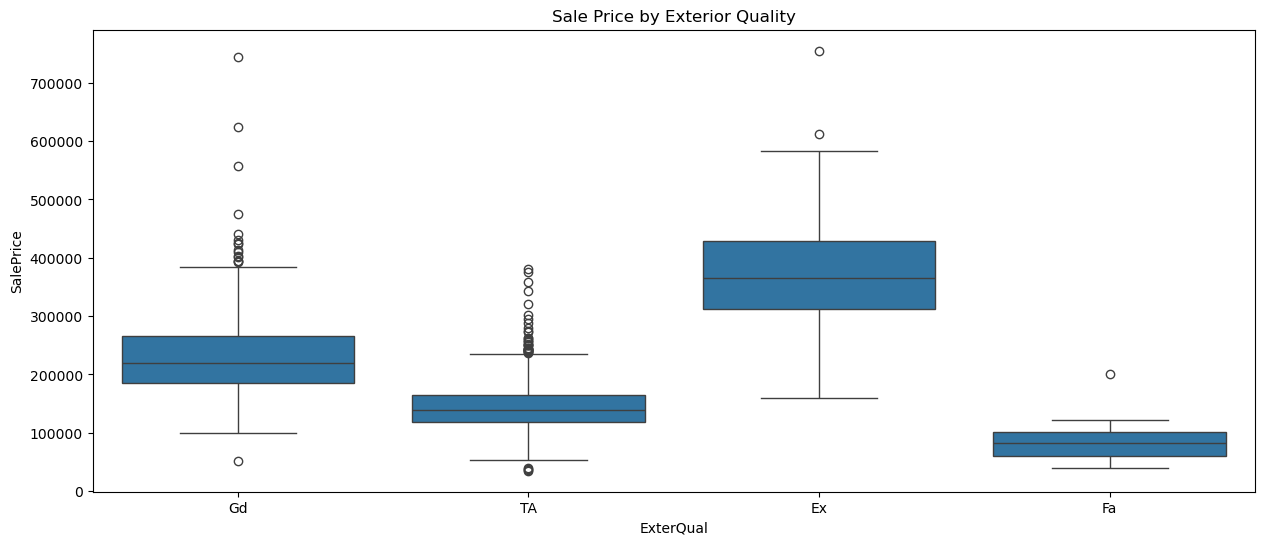

In [74]:
#boxplot for 'ExterQual' vs Sale Price
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxplot(data=train_data, x='ExterQual' , y='SalePrice')
plt.title('Sale Price by Exterior Quality')
plt.show()

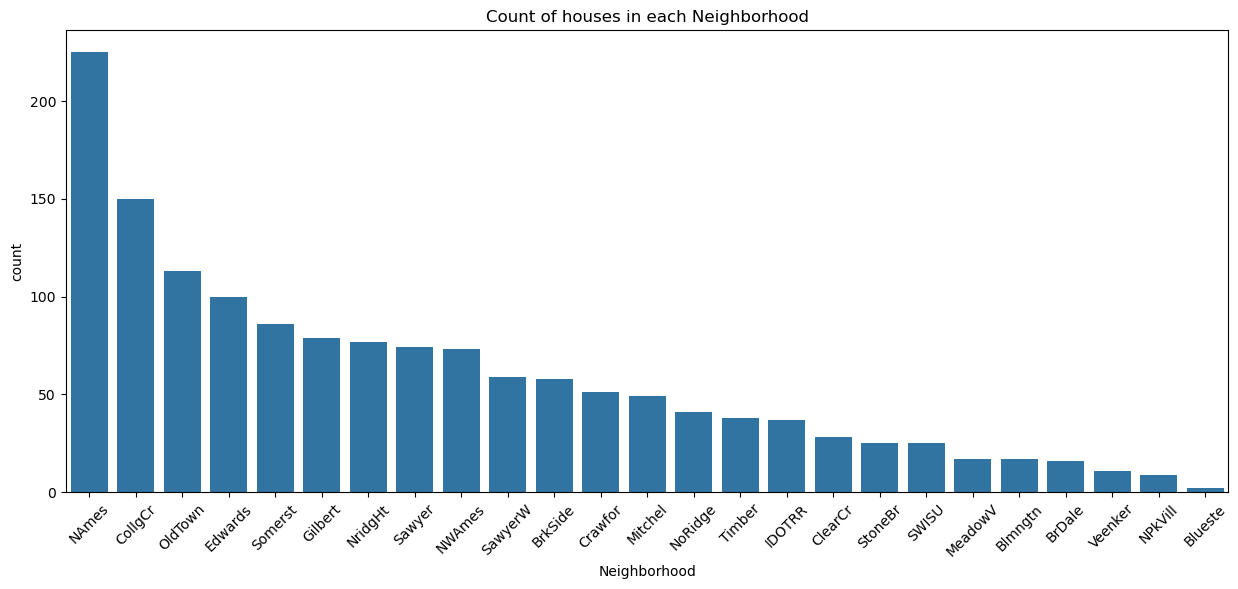

In [85]:
#Count plot for neighbourhood
plt.figure(figsize=(15,6))
sns.countplot(data=train_data, x='Neighborhood' , order=train_data['Neighborhood'].value_counts().index)
# This part counts the occurrences of each unique value in the 'Neighborhood' column and returns the indices of these values sorted by their count in descending order. This ensures that the neighborhoods are ordered by their frequency, with the most common neighborhood appearing first.
plt.title('Count of houses in each Neighborhood')
plt.xticks(rotation=45)
plt.show()

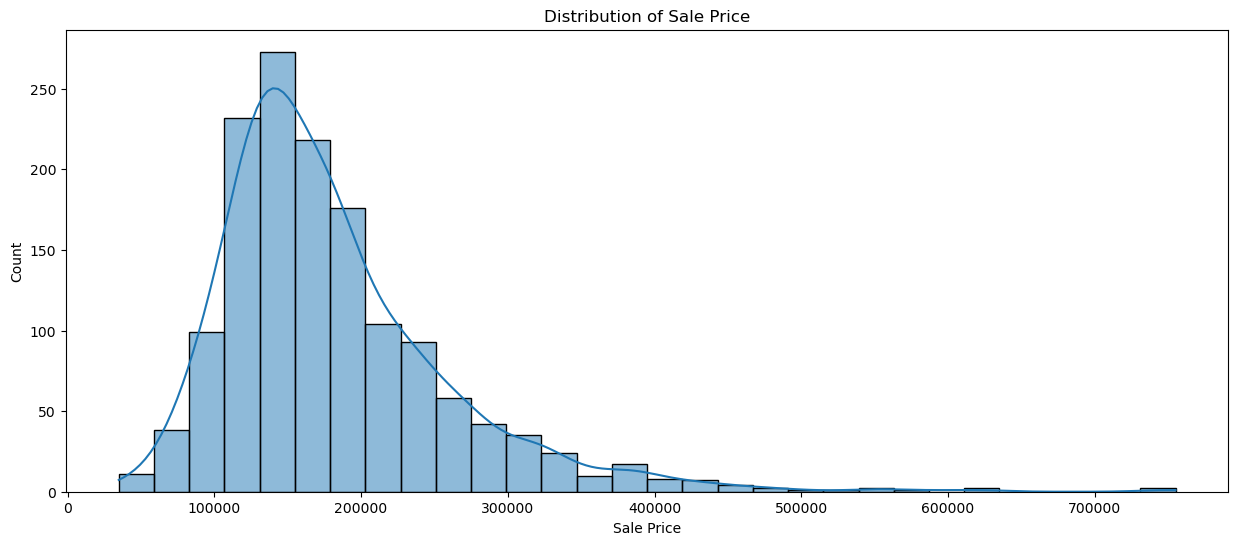

In [87]:
# Histogram for SalePrice
plt.figure(figsize=(15,6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
# 'bins' parameter specifies number of bins(or intervals) to divide the data into
# 'kde' parameter adds a kernel density estimate curve to the histogram
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.show()

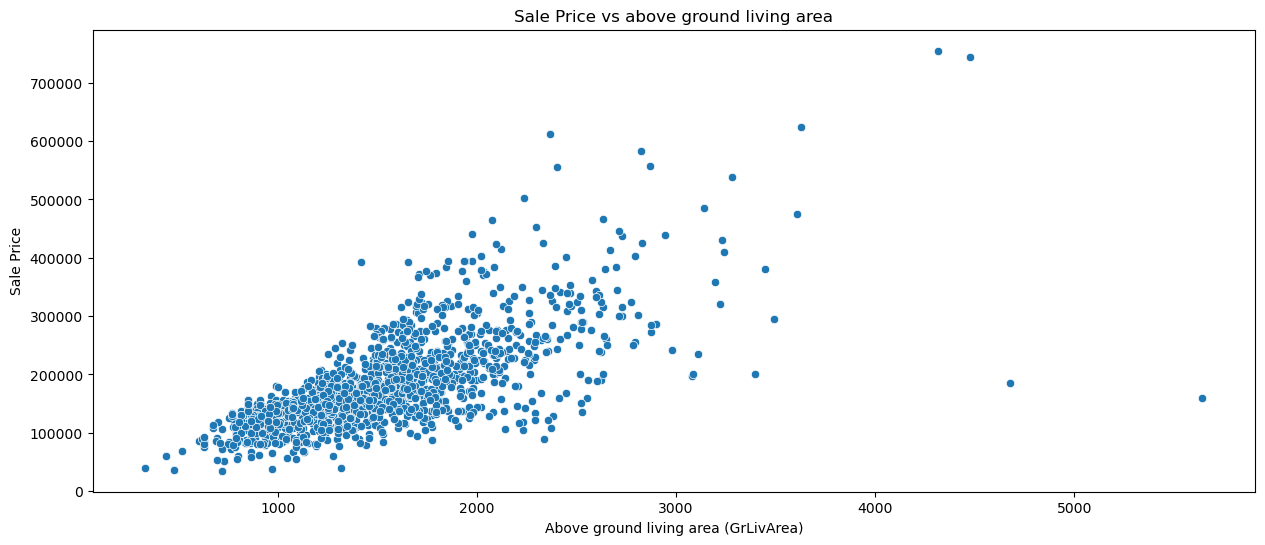

In [89]:
# Scatter plot for GrLivArea vs Sale Price
plt.figure(figsize=(15,6))
sns.scatterplot(data= train_data, x='GrLivArea', y='SalePrice')
plt.title('Sale Price vs above ground living area')
plt.xlabel('Above ground living area (GrLivArea)')
plt.ylabel('Sale Price')
plt.show()

In [91]:
# Correlation Heatmap
plt.figure(figsize=(20,10))
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix= numeric_data.corr()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Figure size 2000x1000 with 0 Axes>

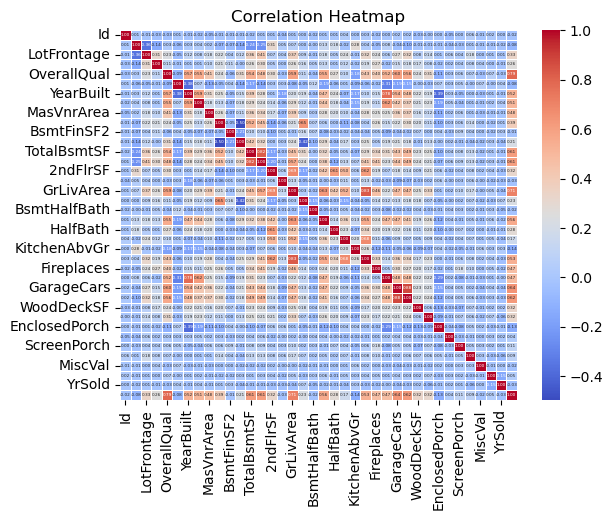

In [93]:
# Correlation Heatmap contd...
# Create the heatmap with annotations.
sns.heatmap(correlation_matrix, annot= True, fmt='.2f', cmap='coolwarm', linewidth=0.5, annot_kws={"size": 3})
# annot=True: Annotate each cell with the correlation coefficient.
# fmt='.2f': Format the annotations to display two decimal places.
# cmap='coolwarm': Use the 'coolwarm' colormap.
# linewidths=0.5: Set the width of the lines that will divide each cell.
# annot_kws={"size": 10}: Set the font size of the annotations to 3.
plt.title('Correlation Heatmap')
plt.show()

Building Models

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
#This process is known as one-hot encoding.
train_data_encoded = pd.get_dummies(train_data, drop_first=True)
#pd.get_dummies(): This function is used to convert categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction. 
#drop_first=True: This parameter drops the first level of each categorical variable, which helps to avoid multicollinearity in the dataset.
#train_data_encoded: The resulting DataFrame with all categorical variables converted into binary (0/1) columns.
X_train = train_data_encoded.drop('SalePrice', axis=1) #Features
y_train = train_data_encoded['SalePrice'] #Target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [96]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression,Ridge
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

Evaluation of Model

In [101]:
# Linear Regression Predictions
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
# comparing the actual y_test that was split in the training data and the predicted values using linear regression
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))



Linear Regression MAE: 20230.08541573446
Linear Regression MSE: 2641638813.223804
Linear Regression R²: 0.6556028072510687


Model Optimization (GridSearchCV & RandomizedSearchCV)

In [104]:
# Linear Regression with Ridge Regularization

ridge= Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid= GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge= ridge_grid.best_estimator_

In [106]:
#making predictions with best models
y_pred_ridge = best_ridge.predict(X_test)

In [108]:
#Evaluating the models (GridSearchCV)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

Ridge Regression MSE: 946611384.1196444
Ridge Regression R^2: 0.8765878583843454


In [110]:
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-3, 3, 7)}  # Logarithmic scale for alpha
ridge_random = RandomizedSearchCV(ridge, ridge_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
ridge_random.fit(X_train, y_train)

C:\Users\dugga\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
                   random_state=42, scoring='neg_mean_squared_error')

In [112]:
y_pred_ridge = best_ridge.predict(X_test)

In [114]:
#Evaluating the models (RandomizedSearchCV)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))


Ridge Regression MSE: 946611384.1196444
Ridge Regression R^2: 0.8765878583843454


Forecasting and Presenting results

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#separate features and target variables
X= train_data.drop('SalePrice', axis=1) #features
y= train_data['SalePrice'] #target variables

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)
categorical_features= X_train.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other features unchanged
)

# Create a pipeline that first transforms the data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())  
])

pipeline.fit(X_train, y_train)
X_test_final = test_data.drop(columns='SalePrice', errors='ignore')
predictions= pipeline.predict(X_test_final)

submission = pd.DataFrame({
    'Id': test_data['Id'],  # Ensure 'Id' is present in test_data
    'SalePrice': predictions  # Add the predicted Sale Prices
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


In [119]:
submission.head()

,Id,SalePrice
0,1461,145482.748488
1,1462,199991.919529
2,1463,209519.066035
3,1464,227205.950587
4,1465,267110.920993
